<a href="https://colab.research.google.com/github/intimanjunath/Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Olivetti_Faces_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#installing packeges
!pip install umap-learn
!pip install plotly

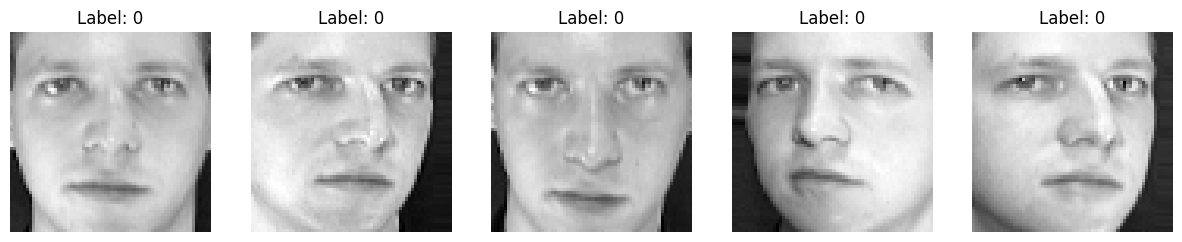

In [24]:
#Load the Olivetti Faces Dataset
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import numpy as np

# Load Olivetti Faces dataset
faces = fetch_olivetti_faces()
X_faces = faces.data  # Image data (400 samples, 4096 features)
y_faces = faces.target  # Target labels

# Visualize a few images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_faces[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Label: {y_faces[i]}")
    ax.axis('off')
plt.show()

In [25]:
#Preprocess the Dataset
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
X_faces_scaled = scaler.fit_transform(X_faces)

#Apply Dimensionality Reduction Techniques

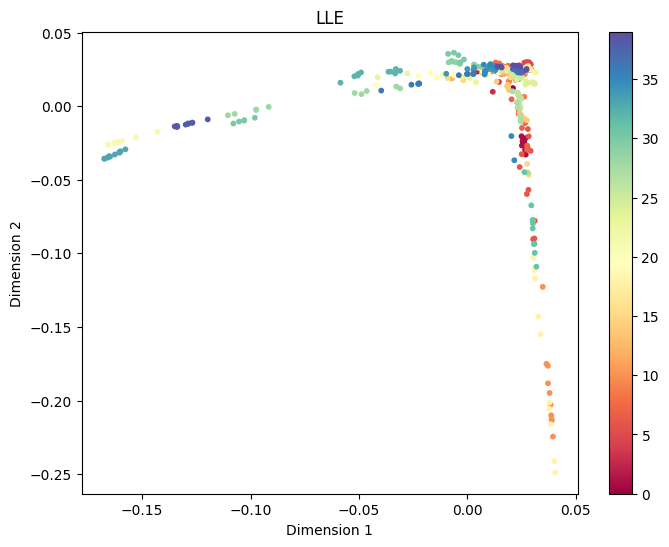

In [26]:
#Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("LLE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

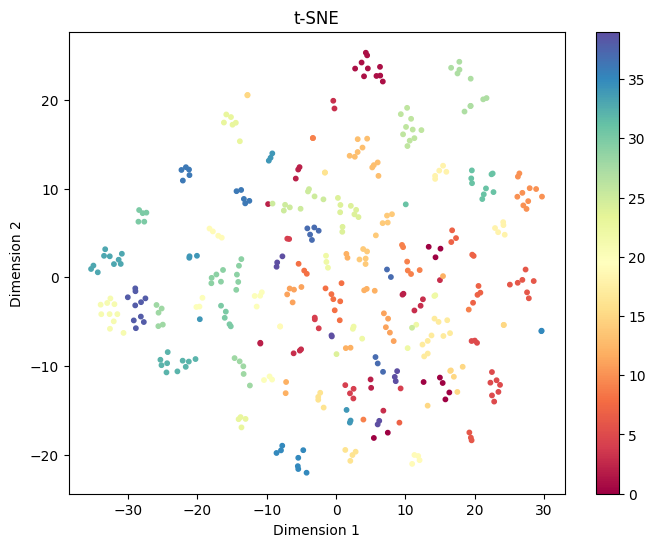

In [27]:
#t-SNE (Interactive Visualization)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("t-SNE")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

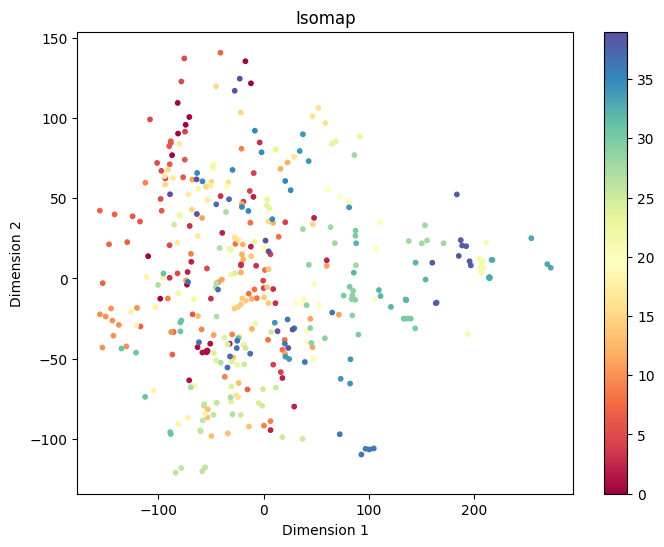

In [28]:
# Isomap
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("Isomap")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


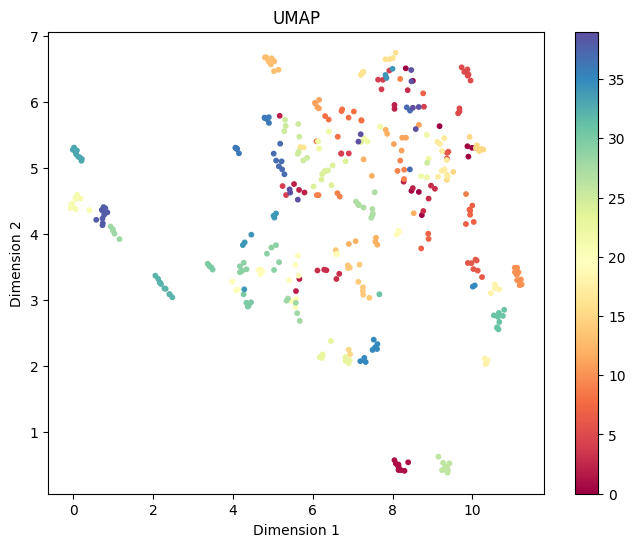

In [29]:
#UMAP (Interactive Visualization)
import umap

umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("UMAP")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

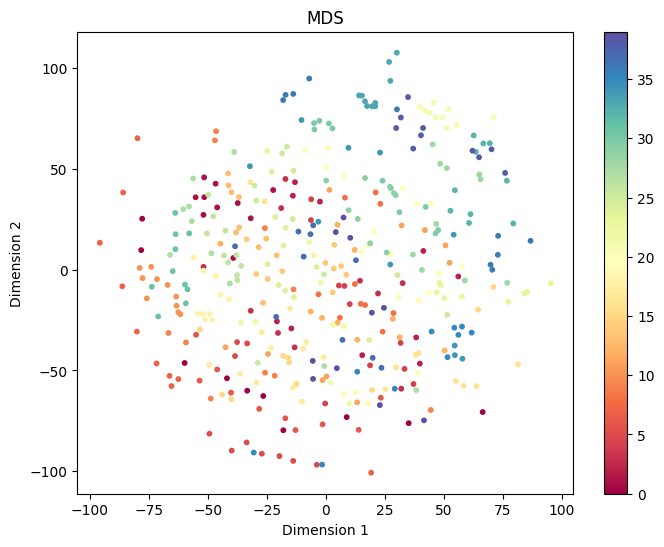

In [30]:
#Multidimensional Scaling (MDS)
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("MDS")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

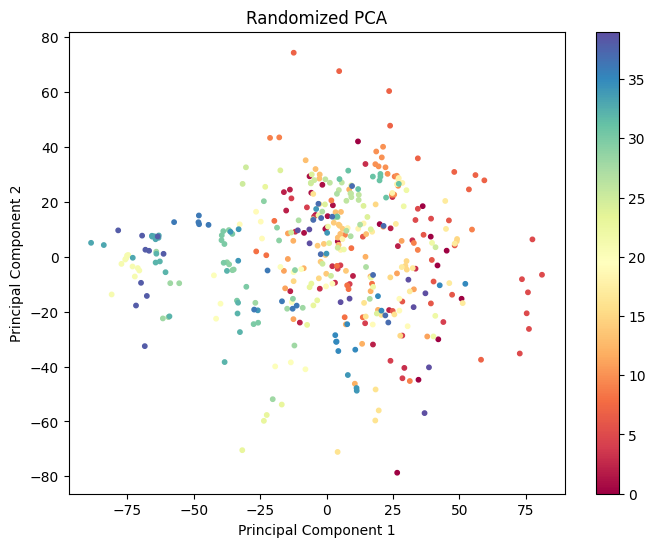

In [31]:
#Randomized PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("Randomized PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

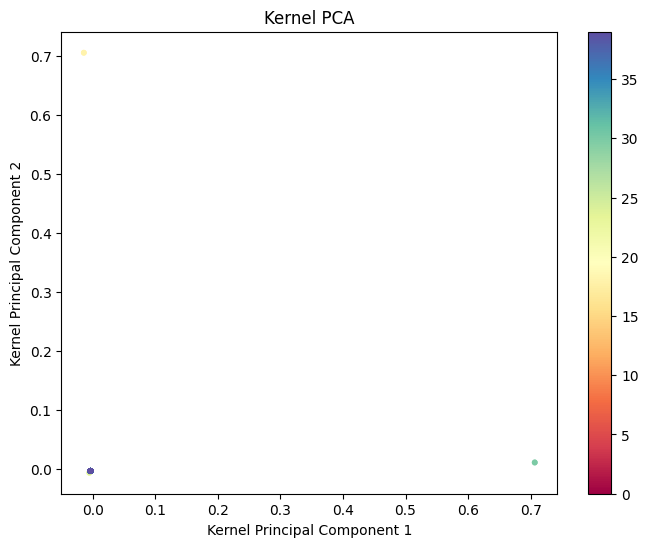

In [32]:
#Kernel PCA
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_kernel_pca = kernel_pca.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("Kernel PCA")
plt.xlabel("Kernel Principal Component 1")
plt.ylabel("Kernel Principal Component 2")
plt.show()

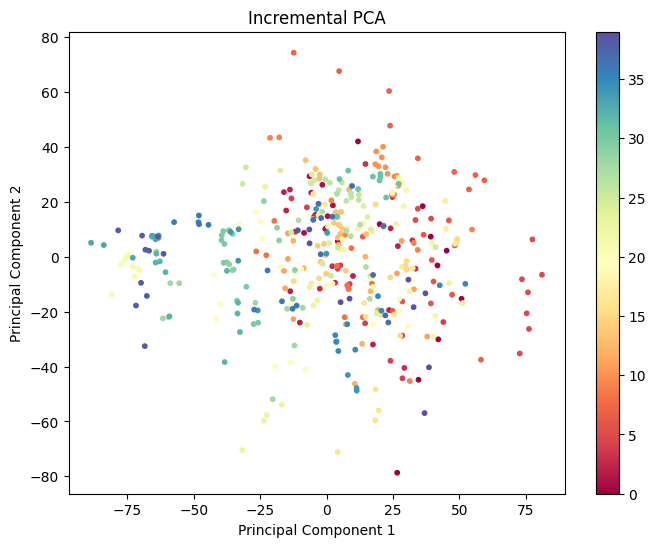

In [33]:
#Incremental PCA
from sklearn.decomposition import IncrementalPCA

incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_incremental_pca[:, 0], X_incremental_pca[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("Incremental PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

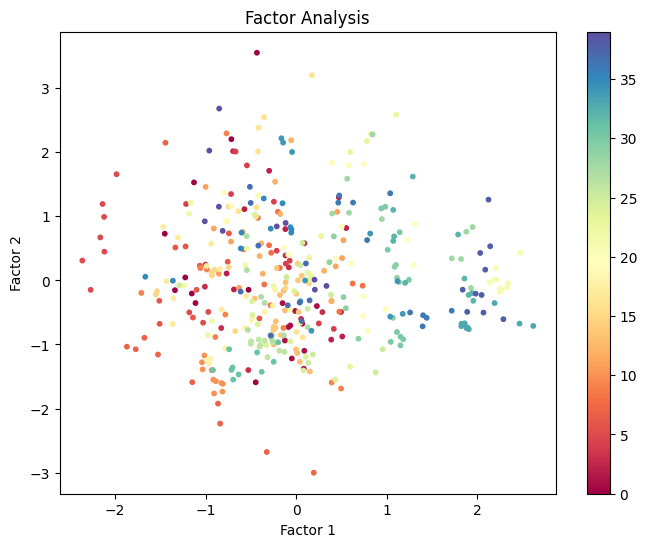

In [34]:
#Factor Analysis
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=2, random_state=42)
X_fa = fa.fit_transform(X_faces_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_fa[:, 0], X_fa[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("Factor Analysis")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

In [35]:
#Autoencoders
from keras.models import Model
from keras.layers import Input, Dense

# Define Autoencoder
input_dim = X_faces_scaled.shape[1]
encoding_dim = 64

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Compile Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
# Train Autoencoder
autoencoder.fit(X_faces_scaled, X_faces_scaled, epochs=50, batch_size=256, shuffle=True, verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.6884
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5791 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2791
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: -0.2335 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: -0.9685
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: -2.0015 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: -3.2794
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: -4.5396
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: -6.7690
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: -9.0100
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: -11.7139 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: -14.6888 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: -18.1191 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: -21.0643 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: -26.9233 
Epoch 1

In [37]:
# Extract Encoder
encoder = Model(input_img, encoded)
X_autoencoded = encoder.predict(X_faces_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


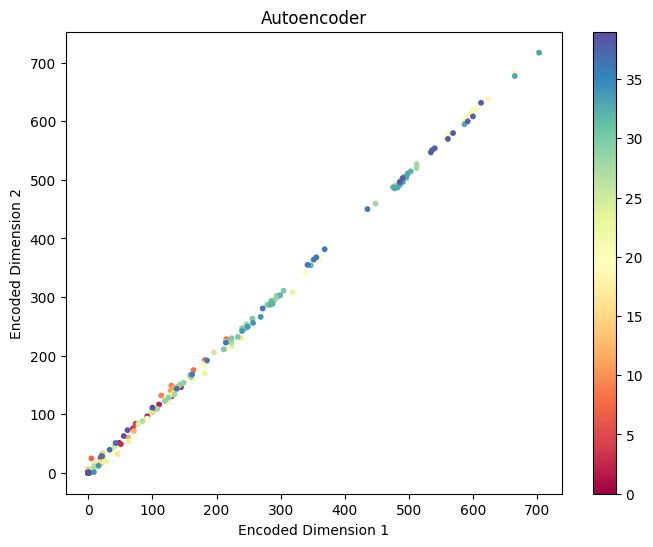

In [38]:
# Visualize Autoencoder results
plt.figure(figsize=(8, 6))
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y_faces, cmap='Spectral', s=10)
plt.colorbar()
plt.title("Autoencoder")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()